## Preamble

In [1]:
SetDirectory["~/Documents/Univ/2nd_GW_QCD"];

In [2]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True, 
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

## Background

In [6]:
ai = {1,1.11724,3.12672 10^(-1),-4.68049 10^(-2),-2.65004 10^(-2),-1.19760 10^(-3),1.82812 10^(-4),1.36436 10^(−4),8.55051 10^(−5),1.22840 10^(−5),3.82259 10^(-7),−6.87035 10^(−9)};
bi = {1.43382 10^(−2),1.37559 10^(−2),2.92108 10^(−3),−5.38533 10^(−4),−1.62496 10^(−4),−2.87906 10^(−5),−3.84278 10^(−6),2.78776 10^(−6),7.40342 10^(−7),1.17210 10^(−7),3.72499 10^(−9),−6.74107 10^(−11)};
ci = {1,6.07869 10^(−1),−1.54485 10^(−1),−2.24034 10^(−1),−2.82147 10^(−2),2.90620 10^(−2),6.86778 10^(−3),−1.00005 10^(−3),−1.69104 10^(−4),1.06301 10^(−5),1.69528 10^(−6),−9.33311 10^(−8)};
di = {7.07388 10,9.18011 10,3.31892 10,−1.39779,−1.52558,−1.97857 10^(−2),−1.60146 10^(−1),8.22615 10^(−5),2.02651 10^(−2),−1.82134 10^(−5),7.83943 10^(−5),7.13518 10^(−5)};

In [10]:
grhohigh[T_] = Sum[ai[[i]]Log[T]^(i-1),{i,12}] / Sum[bi[[i]]Log[T]^(i-1),{i,12}];
gshigh[T_] = grhohigh[T] / (1 + Sum[ci[[i]]Log[T]^(i-1),{i,12}]/Sum[di[[i]]Log[T]^(i-1),{i,12}]);

In [12]:
rhohigh[T_] = \[Pi]^2/30 grhohigh[T] T^4;
shigh[T_] = 2\[Pi]^2/45 gshigh[T] T^3;
phigh[T_] = Simplify[T shigh[T] - rhohigh[T]];

In [15]:
Sfit[x_] = 1 + 7/4 Exp[−1.0419x](1 + 1.034x + 0.456426x^2 + 0.0595249x^3);
frho[x_] = Exp[−1.04855x](1 + 1.03757x + 0.508630x^2 + 0.0893988x^3);
brho[x_] = Exp[−1.03149x](1 + 1.03317x + 0.398264x^2 + 0.0648056x^3);
fs[x_] = Exp[−1.04190x](1 + 1.03400x + 0.456426x^2 + 0.0595248x^3);
bs[x_] = Exp[−1.03365x](1 + 1.03397x + 0.342548x^2 + 0.0506182x^3);

In [20]:
me = 511 10^(-6);
mmu = 0.1056;
mpi0 = 0.13;
mpipm = 0.140;
m1 = 0.5;
m2 = 0.77;
m3 = 1.2;
m4 = 2;

In [28]:
Tnu[T_] = (4/11)^(1/3) Sfit[me/T]^(1/3) T;

In [29]:
grhogammalow[T_] = 2.030 + 3.495frho[me/T] + 3.446frho[mmu/T] + 1.05brho[mpi0/T] + 2.08brho[mpipm/T] + 4.165brho[m1/T] + 30.55brho[m2/T] + 89.4brho[m3/T] + 8209brho[m4/T];
gsgammalow[T_] = 2.008 + 3.442fs[me/T] + 3.468fs[mmu/T] + 1.034bs[mpi0/T] + 2.068bs[mpipm/T] + 4.16bs[m1/T] + 30.55bs[m2/T] + 90bs[m3/T] + 6209bs[m4/T];
grhonulow[T_] = 1.353Sfit[me/T]^(4/3);
gsnulow[T_] = 1.923Sfit[me/T];

In [33]:
rhogammalow[T_] = \[Pi]^2/30 grhogammalow[T] T^4;
sgammalow[T_] = 2\[Pi]^2/45 gsgammalow[T] T^3;
rhonulow[T_] = \[Pi]^2/30 grhonulow[T] T^4;
snulow[T_] = 2\[Pi]^2/45 gsnulow[T] T^3;
pgammalow[T_] = Simplify[T sgammalow[T] - rhogammalow[T]];
pnulow[T_] = Simplify[Tnu[T] snulow[T] - rhonulow[T]];
rholow[T_] = Simplify[rhogammalow[T] + rhonulow[T]];
plow[T_] = Simplify[pgammalow[T] + pnulow[T]];

In [41]:
Tth = 0.12;

In [42]:
grho[T_] := grhohigh[T] /; T>=Tth
grho[T_] := grhogammalow[T] + grhonulow[T] /; T<Tth
grhop[T_] := grhohigh'[T] /; T>=Tth
grhop[T_] := grhogammalow'[T] + grhonulow'[T] /; T<Tth
gs[T_] := gshigh[T] /; T>=Tth
gs[T_] := gsgammalow[T] + gsnulow[T] /; T<Tth

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       Dashing[{Small, Small}], AbsoluteThickness[2]]}, {g   , g   }, 
                                                           * ρ   * s
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.2, 0.8}, Identity]]
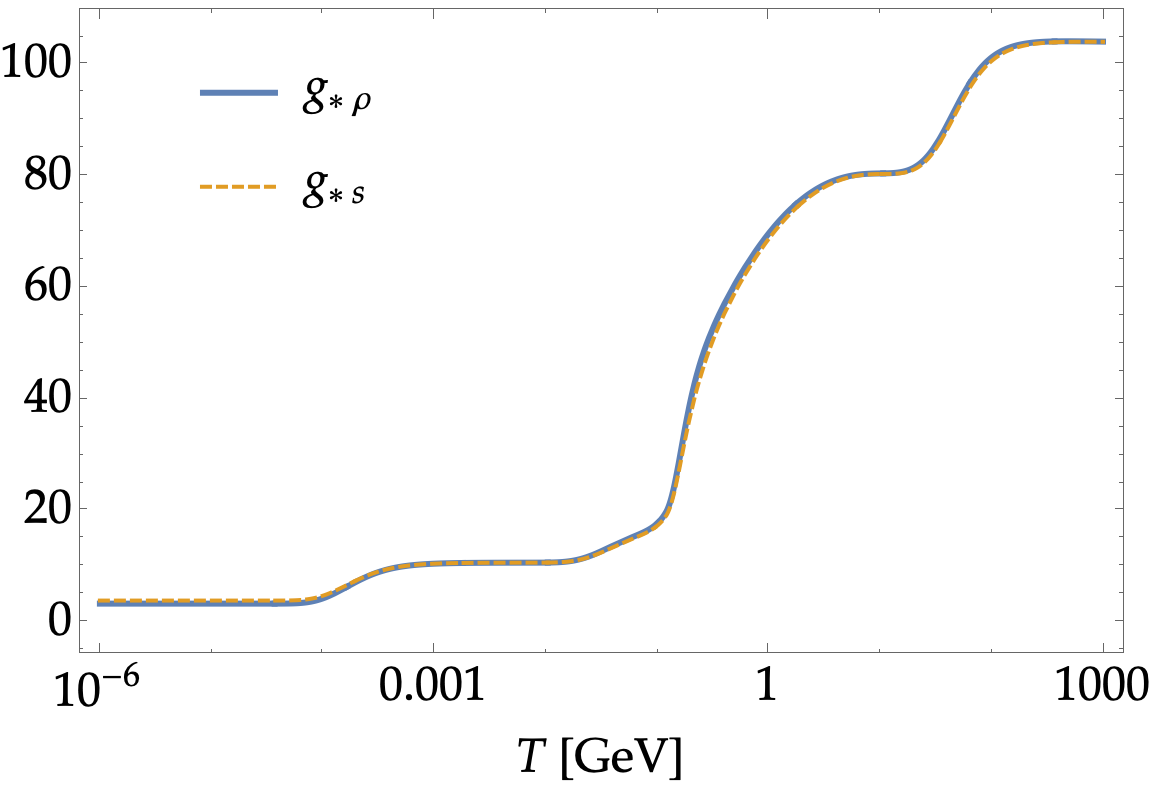

In [48]:
LogLinearPlot[{grho[T],gs[T]},{T,10^(-6),10^3}, FrameLabel->{Row[{T, " [GeV]"}],None}, PlotStyle->{AbsoluteThickness[3],{Dashed,AbsoluteThickness[2]}}, 
              PlotLegends->Placed[{Subscript[g,"*"\[Rho]],Subscript[g,"*"s]}, {0.2,0.8}]] // Quiet

In [48]:
rho[T_] := rhohigh[T] /; T>=Tth
rho[T_] := rholow[T] /; T<Tth
press[T_] := phigh[T] /; T>=Tth
press[T_] := plow[T] /; T<Tth

In [52]:
EoSw[T_] = press[T] / rho[T];
cs2[T_] := phigh'[T] / rhohigh'[T] /; T>=Tth (*4(4gshigh[T]+T gshigh'[T])/3/(4grhohigh[T]+T grhohigh'[T]) - 1 /; T>=Tth;*)
cs2[T_] := plow'[T] / rholow'[T] /; T<Tth

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
                                                               2
>       AbsoluteThickness[2], Dashing[{Small, Small}]]}, {w, c  }, 
                                                              s
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.2, 0.2}, Identity]]
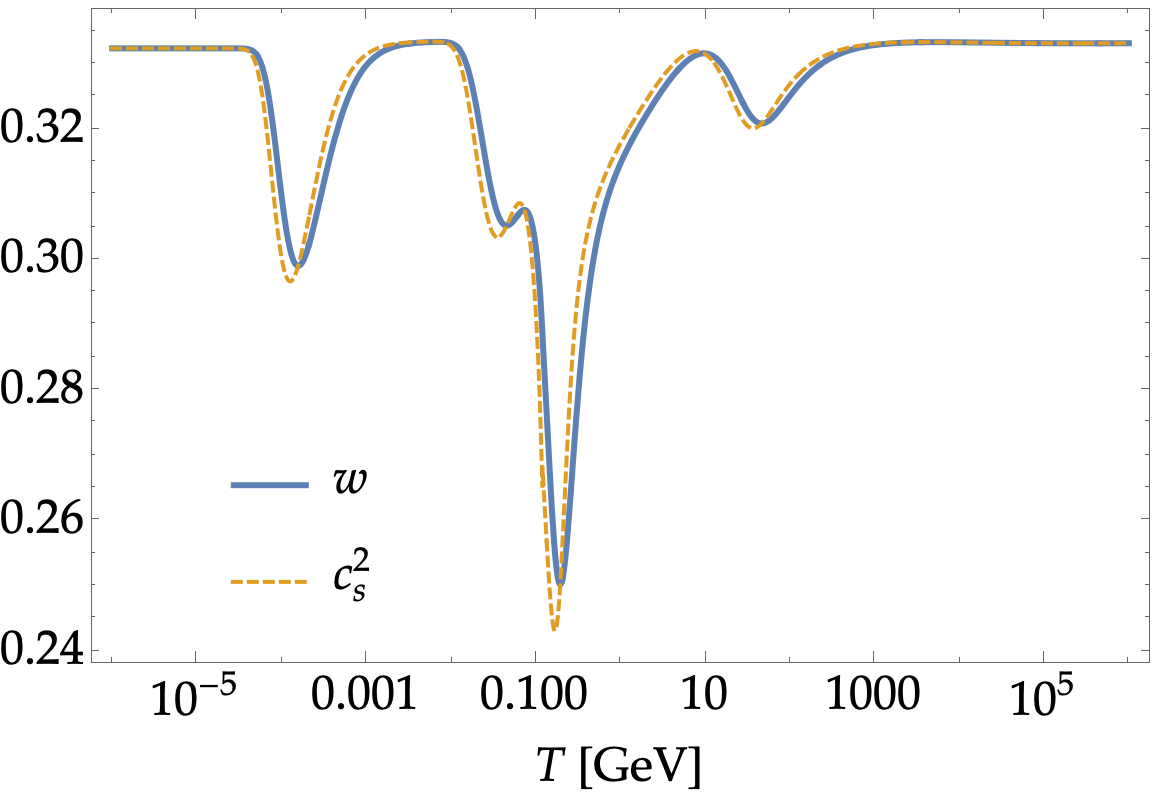

In [55]:
LogLinearPlot[{EoSw[T],cs2[T]},{T,10^-6,10^6},PlotRange->Full,PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dashed}}, 
              FrameLabel->{Row[{T," [GeV]"}],None}, PlotLegends->Placed[{w,Subscript[c,s]^2}, {0.2,0.2}]] // Quiet

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
                                                               2
>       AbsoluteThickness[2], Dashing[{Small, Small}]]}, {w, c  }, 
                                                              s
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.8, 0.8}, Identity]]
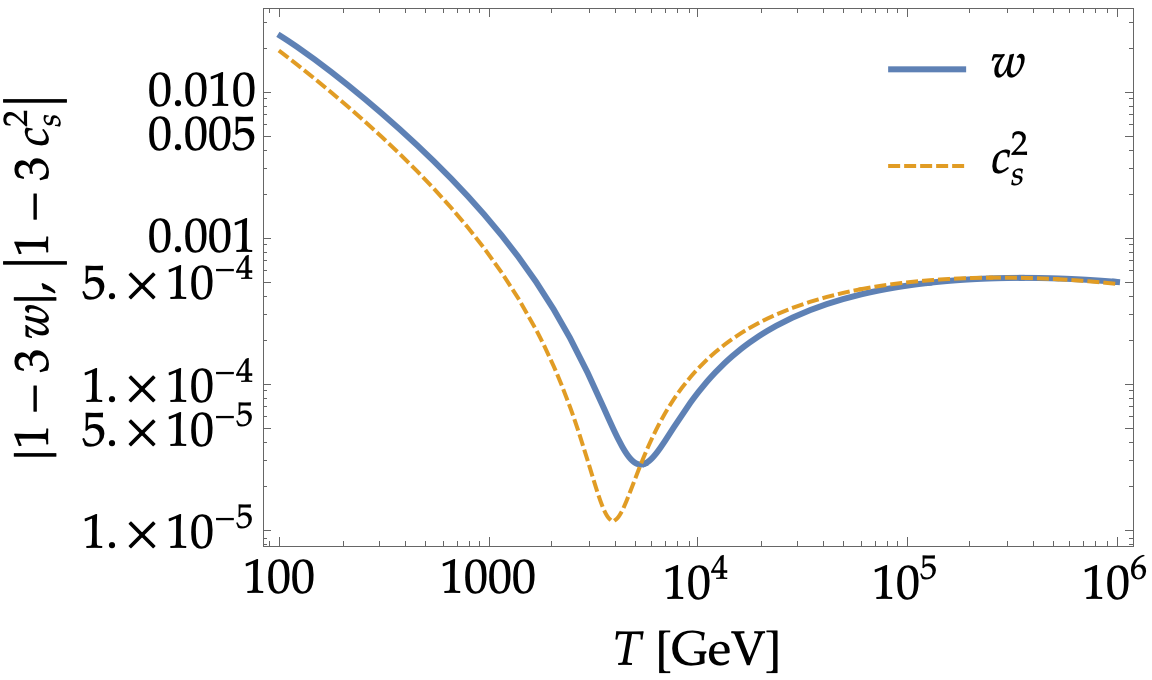

In [57]:
LogLogPlot[{Abs[1-3EoSw[T]],Abs[1-3cs2[T]]},{T,100,10^6}, FrameLabel->{Row[{T, " [GeV]"}], Row[{Abs[1-3w], ", ", Abs[1-3 Subscript[c,s]^2]}]}, 
           PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dashed}}, PlotLegends->Placed[{w,Subscript[c,s]^2}, {0.8,0.8}]]

In [55]:
Mpl = 2.435 10^18;
KinGeV = 1 / (1.160451812 10^4) 10^(-9)
Mpcinm = 3.08568 10^22;
GeVinminv = 10^9 / (1.97327 10^(-7))
GeVinMpcinv = GeVinminv Mpcinm

-14
8.61733 10
          15
5.06773 10
          38
1.56374 10

In [60]:
grho0 = grho[10^(-6)] // Quiet
gs0 = gs[10^(-6)] // Quiet
T0 = 2.725 KinGeV

3.383
3.931
          -13
2.34822 10

In [63]:
scalea[T_] = (gs0/gs[T])^(1/3) T0/T;
calH[T_] = Sqrt[scalea[T]^2rho[T]/3/Mpl^2] GeVinMpcinv (*Mpc^-1*);

In [65]:
Ti = 10^6;
rhoi = rho[Ti]
etai = 1/calH[Ti]
scaleai = scalea[Ti]

25
3.4384 10
          -14
5.84589 10
          -20
7.86804 10

In [69]:
etaf = 10^-1;

{0.65923, Null}
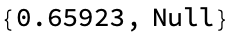

In [70]:
bgsol = NDSolve[{T'[eta] == -\[Pi]/Sqrt[10] gs0^(1/3)T0/Mpl 
                 (1+EoSw[T[eta]])grho[T[eta]]^(3/2)T[eta]^2 / (gs[T[eta]]^(1/3)
                                                                  (grhop[T[eta]]T[eta]+4grho[T[eta]])) GeVinMpcinv,
                 T[etai] == Ti},
                T[eta],{eta,etai,etaf}(*, WorkingPrecision->30*)][[1]]; // Quiet // AbsoluteTiming

In [71]:
Tsol[eta_] = T[eta] /. bgsol;
calHsol[eta_] = calH[Tsol[eta]];
asol[eta_] = scalea[Tsol[eta]];
EoSwsol[eta_] = EoSw[Tsol[eta]];
cs2sol[eta_] := cs2[Tsol[eta]];
grhosol[eta_] = grho[Tsol[eta]];
gssol[eta_] = gs[Tsol[eta]];

In [78]:
asolList = Table[{10^logeta,asol[10^logeta] // Quiet}, {logeta,Log10[etai],Log10[etaf],10^-2}];
aint[eta_] = Interpolation[asolList][eta];
calHList = Table[{10^logeta,calHsol[10^logeta] // Quiet}, {logeta,Log10[etai],Log10[etaf],10^-2}];
calHint[eta_] = Interpolation[calHList][eta];
EoSwList = Table[{10^logeta, EoSwsol[10^logeta] // Quiet},{logeta,Log10[etai],Log10[etaf],10^-2}];
cs2List = Table[{10^logeta, cs2sol[10^logeta] // Quiet},{logeta,Log10[etai],Log10[etaf],10^-2}];
EoSwint[eta_] = Interpolation[EoSwList][eta];
cs2int[eta_] = Interpolation[cs2List][eta];
grhoList = Table[{10^logeta,grhosol[10^logeta] // Quiet}, {logeta,Log10[etai],Log10[etaf],10^-2}];
gsList = Table[{10^logeta,gssol[10^logeta] // Quiet}, {logeta,Log10[etai],Log10[etaf],10^-2}];
grhoint[eta_] = Interpolation[grhoList][eta];
gsint[eta_] = Interpolation[gsList][eta];

-Graphics-
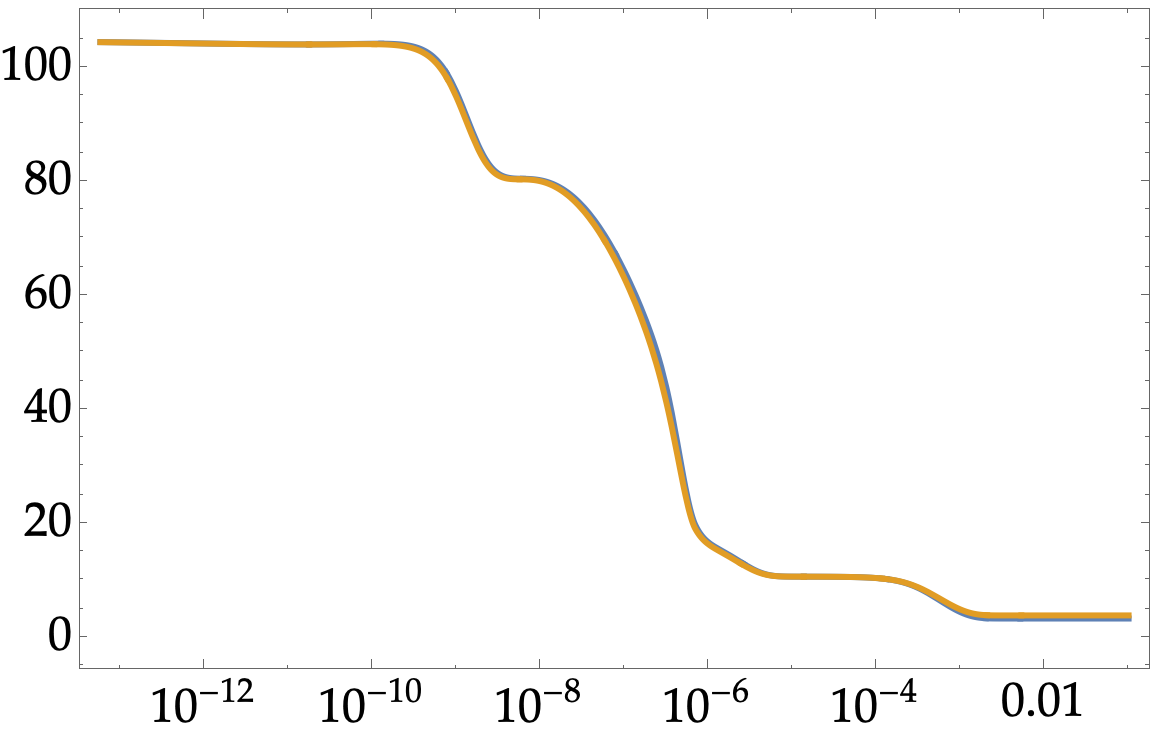

In [90]:
LogLinearPlot[{grhoint[eta],gsint[eta]},{eta,etai,etaf}]

-Graphics-
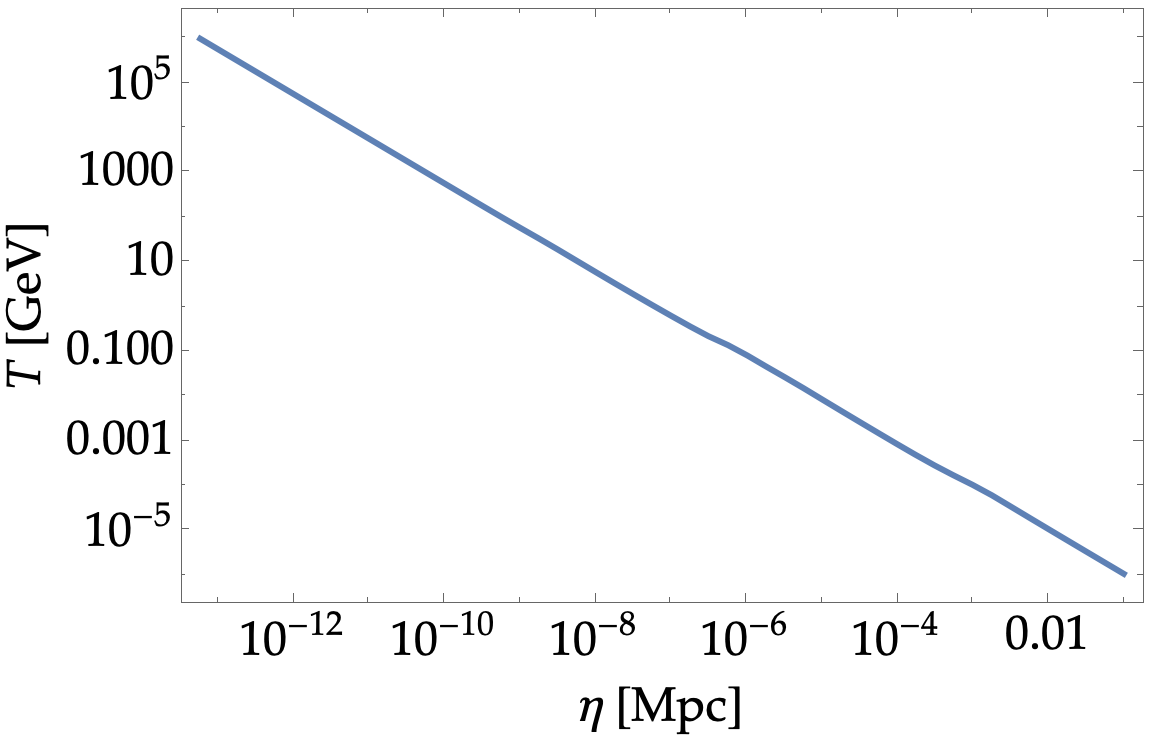

In [94]:
Tvseta = LogLogPlot[Tsol[eta],{eta,etai,etaf},FrameLabel->{Row[{\[Eta], " [Mpc]"}], Row[{T, " [GeV]"}]}]

In [ ]:
Export["git/paper/QCD_GW/figYT/T_eta.pdf",Tvseta];

-Graphics-
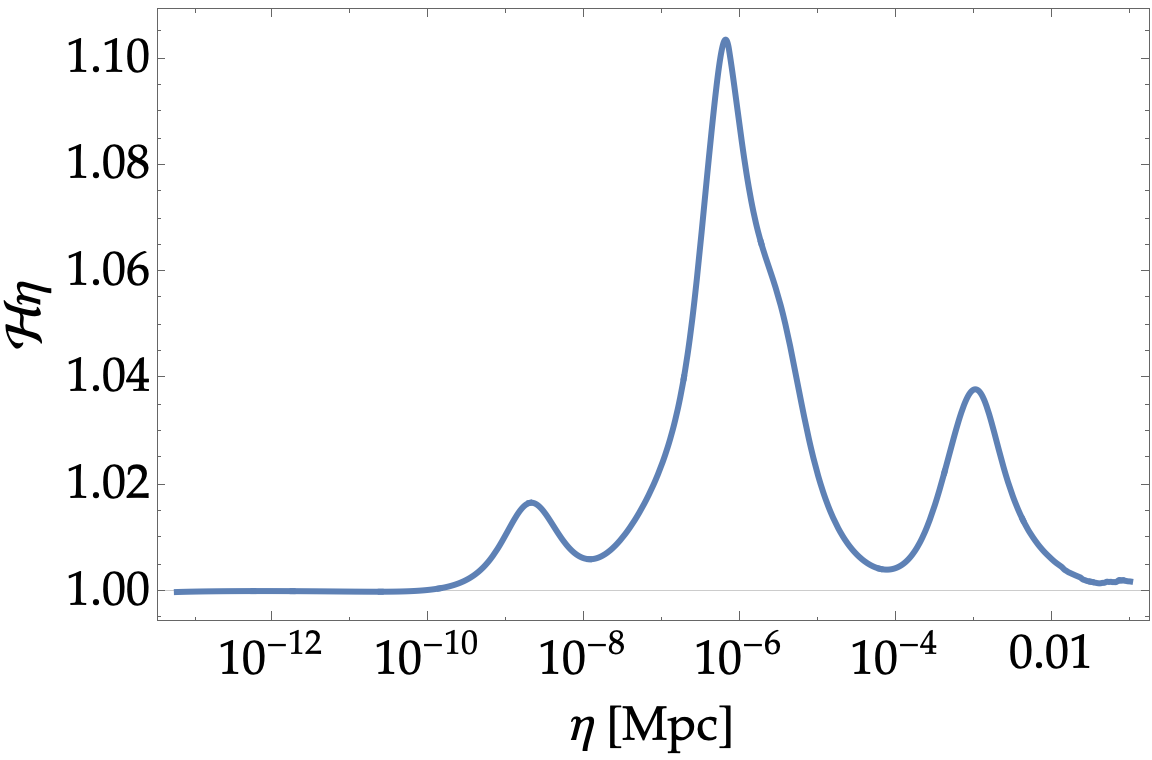

In [95]:
calHvseta = LogLinearPlot[calHint[eta]eta,{eta,etai,etaf},PlotRange->Full,GridLines->{None,{1}},FrameLabel->{Row[{\[Eta], " [Mpc]"}],\[ScriptCapitalH]\[Eta]}]

In [ ]:
Export["git/paper/QCD_GW/figYT/calH_eta.pdf",calHvseta];

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
                                                               2
>       AbsoluteThickness[2], Dashing[{Small, Small}]]}, {w, c  }, 
                                                              s
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.2, 0.2}, Identity]]
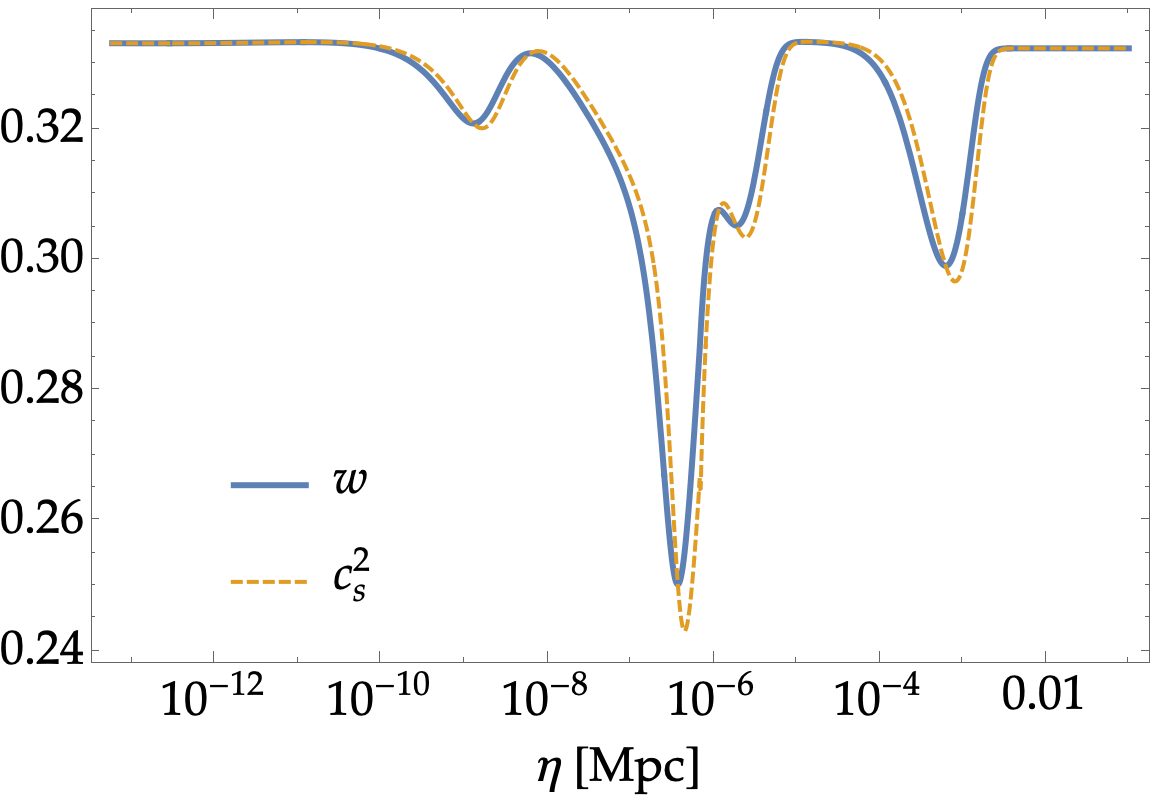

In [96]:
LogLinearPlot[{EoSwint[eta],cs2int[eta]},{eta,etai,etaf},PlotRange->Full, PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dashed}},
              FrameLabel->{Row[{\[Eta], " [Mpc]"}],None}, PlotLegends->Placed[{w,Subscript[c,s]^2}, {0.2,0.2}]] // Quiet

## scalar mode function

In [91]:
xi = 10^-2;
xf = 1000;

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0992904} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0992904} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0992904} lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

{184.185, Null}
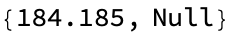

In [93]:
PhiList[eta_] = Table[{k=10^logk;k,
                    ptbsol = NDSolve[{Phi''[eta] + 3calHint[eta](1+cs2int[eta]) Phi'[eta] 
                                + (cs2int[eta]k^2+3calHint[eta]^2(cs2int[eta]-EoSwint[eta]))Phi[eta] == 0,
                                Phi[xi/k] == 1, Phi'[xi/k] == 0},
                                Phi[eta],{eta,xi/k,xf/k}, (*WorkingPrecision->30,*) MaxSteps->10^5][[1]];
                                Phi[eta] /. ptbsol},
                                {logk,4,10,10^-2}]; // AbsoluteTiming
Clear[k];

{140.751, Null}
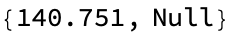

In [101]:
Export["num/fast2/PhiList.wdx",PhiList[eta]]; // AbsoluteTiming

In [95]:
PhipList[eta_] = Table[{PhiList[eta][[i,1]] ,D[PhiList[eta][[i,2]],eta]},{i,Length[PhiList[eta]]}];

{1.10067, Null}
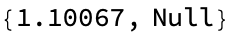

In [96]:
calPList[x_] = Table[{k=PhiList[x/k][[i,1]];k,
                      PhiList[x/k][[i,2]]^2 + PhipList[x/k][[i,2]]^2/k^2/cs2int[x/k]},
                      {i,Length[PhiList[x]]}]; // AbsoluteTiming
Clear[k];

In [98]:
PhiRad[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);
calPRad[x_] = PhiRad[x]^2 + PhiRad'[x]^2/(1/3);

-Graphics-
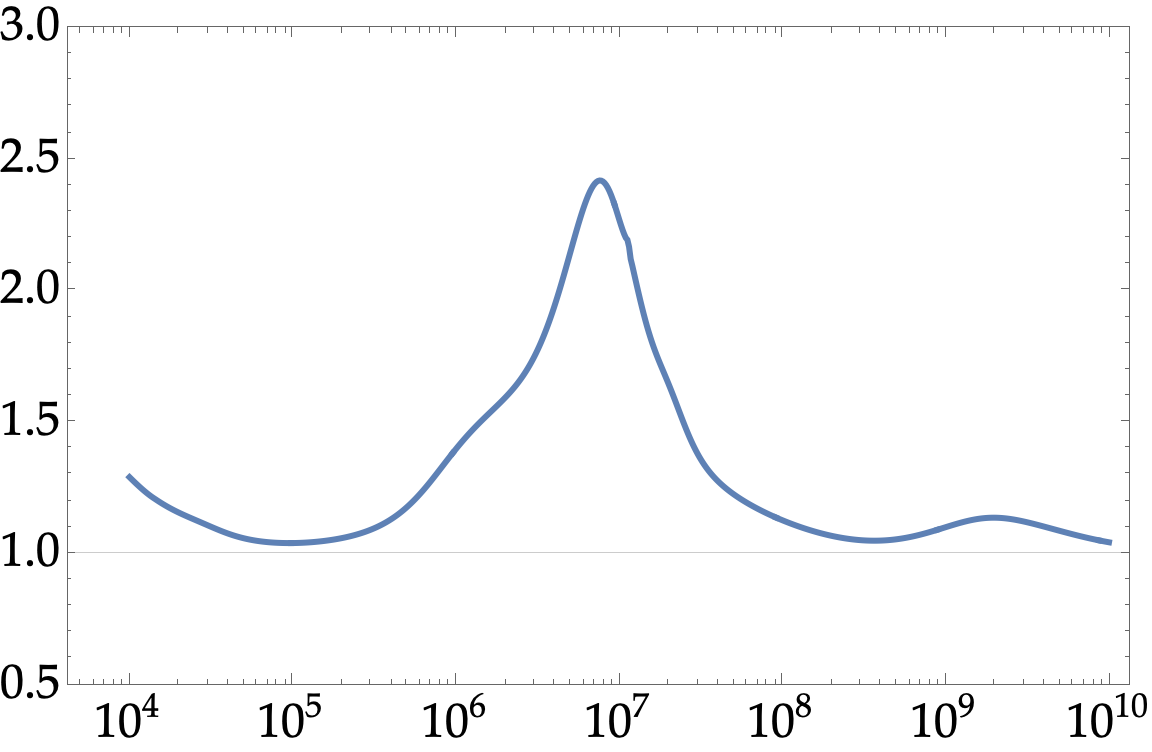

In [100]:
ListLogLinearPlot[calPList[x].DiagonalMatrix[{1,calPRad[x]^(-1)}] /. {x->8},PlotRange->{0.5,3},GridLines->{None,{1}}]

## GW mode function

In [85]:
xi = 10^-2;
xf = 1000;

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0992785} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0992785} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0992811} lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

{541.17, Null}
{554.092, Null}
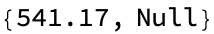
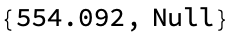

In [104]:
Clear[k];
G1List[eta_] = Table[k=10^logk;
                    ptbsol = NDSolve[{G''[eta]+(k^2-(1-3EoSwint[eta])/2*calHint[eta]^2)G[eta]==0,
                                    G[xi/k]==1,G'[xi/k]==0},G[eta],{eta,xi/k,xf/k},MaxSteps->10^6
                                    (*,WorkingPrecision->10*)(*,AccuracyGoal->10*),PrecisionGoal->10][[1]];
                    {k,G[eta]/.ptbsol},{logk,4,10,10^-2}]; // AbsoluteTiming
G2List[eta_] = Table[k=10^logk;
                    ptbsol = NDSolve[{G''[eta]+(k^2-(1-3EoSwint[eta])/2*calHint[eta]^2)G[eta]==0,
                                    G'[xi/k]==k,G[xi/k]==0},G[eta],{eta,xi/k,xf/k},MaxSteps->10^6
                                    (*,WorkingPrecision->10*)(*,AccuracyGoal->10*),PrecisionGoal->10][[1]];
                    {k,G[eta]/.ptbsol},{logk,4,10,10^-2}]; // AbsoluteTiming
Clear[k];

{521.724, Null}
{517.101, Null}
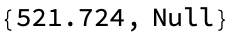
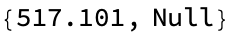

In [112]:
Export["num/fast2/G1List.wdx",G1List[eta]]; // AbsoluteTiming
Export["num/fast2/G2List.wdx",G2List[eta]]; // AbsoluteTiming

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                        -10
Input value {2.51248 10   } lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                        -10
Input value {2.51248 10   } lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                        -10
Input value {2.51248 10   } lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

-Graphics-
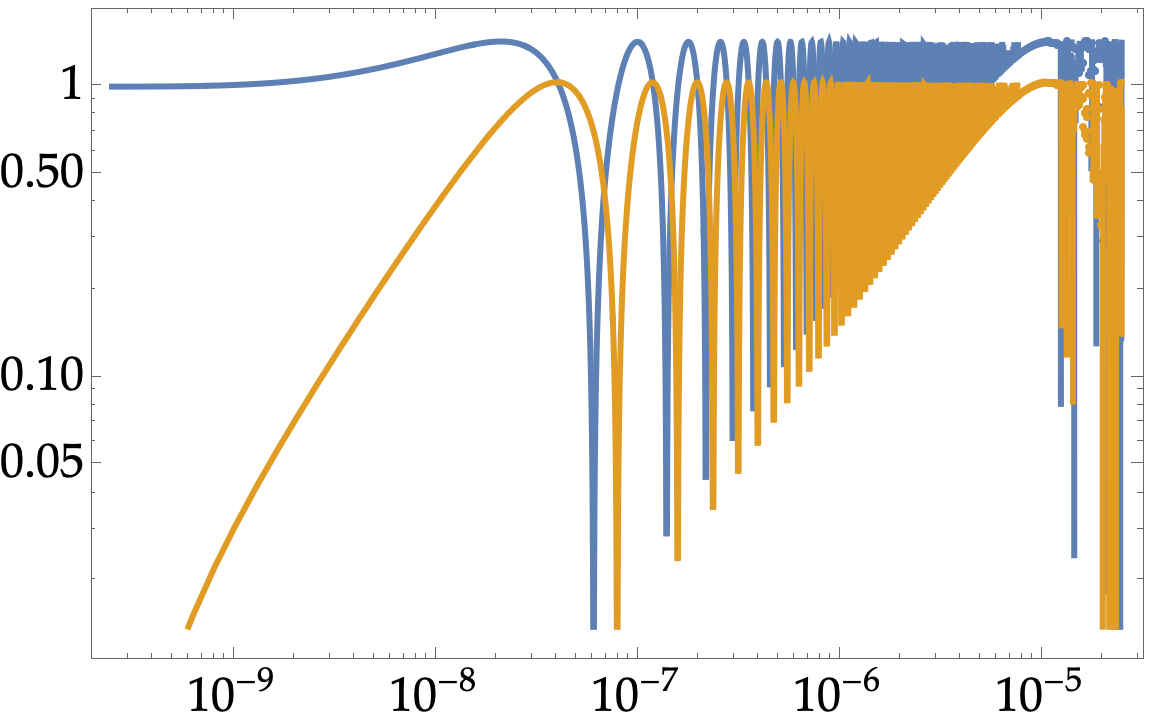

In [114]:
LogLogPlot[{Abs[G1List[eta][[361,2]]],Abs[G2List[eta][[361,2]]]}
        ,{eta,xi/G1List[eta][[361,1]],xf/G1List[eta][[361,1]]}]

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000246165} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000246165} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000246165} lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

-Graphics-
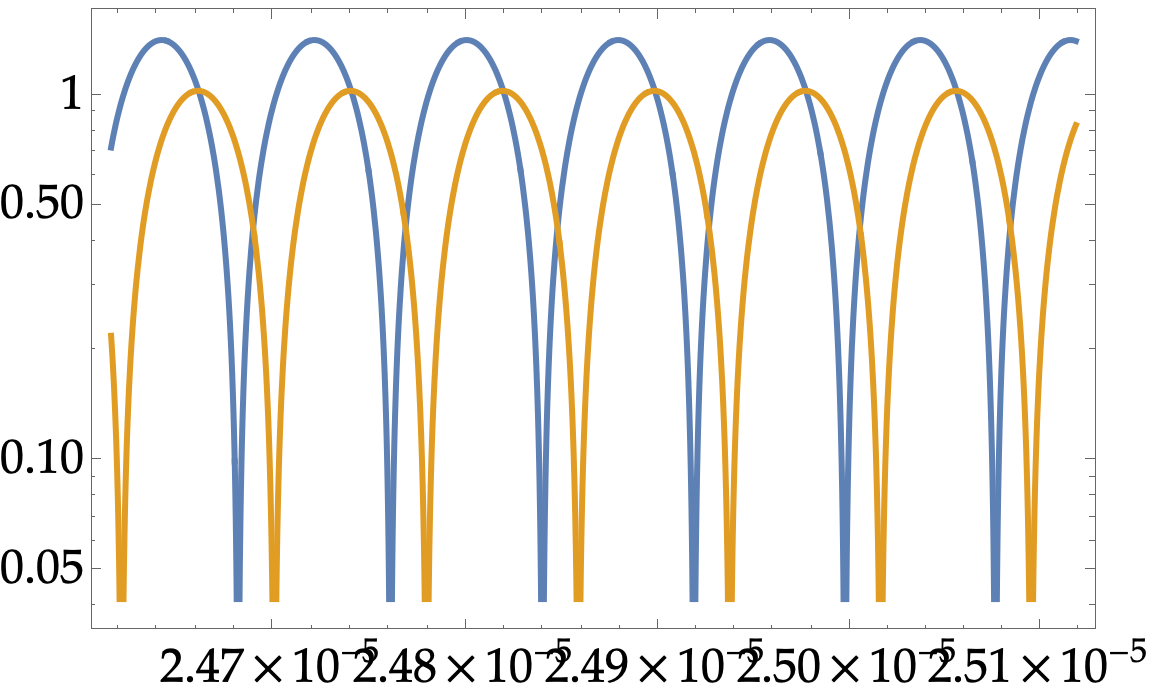

In [115]:
LogLogPlot[{Abs[G1List[eta][[361,2]]],Abs[G2List[eta][[361,2]]]}
            ,{eta,(xf-20)/G1List[eta][[361,1]],xf/G1List[eta][[361,1]]}]

## convolution

In [6]:
PhiRD[x_] = 9/x^2 (Sin[x/Sqrt[3]]/(x/Sqrt[3]) - Cos[x/Sqrt[3]]);

In [15]:
ItRD1[k1_,k2_,kGW_,eta_] := 
    kGW NIntegrate[etap Sin[kGW etap] (2PhiRD[k1 etap] PhiRD[k2 etap] 
        + (PhiRD[k1 etap] + PhiRD'[k1 etap] k1 etap)(PhiRD[k2 etap] + PhiRD'[k2 etap] k2 etap) )
    ,{etap,0,eta},WorkingPrecision->15]
ItRD2[k1_,k2_,kGW_,eta_] := 
    kGW NIntegrate[etap Cos[kGW etap] (2PhiRD[k1 etap] PhiRD[k2 etap] 
        + (PhiRD[k1 etap] + PhiRD'[k1 etap] k1 etap)(PhiRD[k2 etap] + PhiRD'[k2 etap] k2 etap) )
    ,{etap,0,eta},WorkingPrecision->15]
ItRD2bar[It1_,It2_] = (It1^2+It2^2)/2;

In [18]:
ItRD2bar[ItRD1[10^logk1,10^logk2,1,400],ItRD2[10^logk1,10^logk2,1,400]] /. {logk1->3/10,logk2->1/10} // Quiet // AbsoluteTiming

{5.6576, 4.36356800902847}

In [51]:
dlog10k = 10^-2;
dlog10k1 = 2 dlog10k;
dlog10k2 = 3 dlog10k;
dlogk1 = dlog10k1 Log[10];
dlogk2 = dlog10k2 Log[10];
Select[Flatten[Table[If[Abs[10^logk1-10^logk2] <= 1 <= 10^logk1+10^logk2,
                    {10^logk1,10^logk2}, {0}], {logk1,-1,1,dlog10k1}, 
                    {logk2,-1,logk1,dlog10k2}], 1], #[[1]] != 0&] // Length
OGWcRD[k_,eta_] := 2 8/243 dlogk1 dlogk2 *
    Sum[If[Abs[10^logk1-10^logk2] <= k <= 10^logk1+10^logk2,
        ( 10^(2 logk1) - (k^2-10^(2 logk2)+10^(2 logk1))^2/4/k^2 )^2 / 10^logk1 / 10^logk2  *
            ItRD2bar[ItRD1[10^logk1,10^logk2,k,eta], ItRD2[10^logk1,10^logk2,k,eta] ],
        0], {logk1,Log10[k]-1,Log10[k]+1,dlog10k1},{logk2,Log10[k]-1,logk1,dlog10k2}]

696

In [42]:
OGWcRD[1,400] // Quiet // AbsoluteTiming (*5 5*)

{1711.91, 0.80634411665828}

In [50]:
OGWcRD[1,400] // Quiet // AbsoluteTiming (*2 5*)

{3707.62, 0.75960378076499}

In [58]:
OGWcRD[1,400] // Quiet // AbsoluteTiming (*2 3*)

{6420.52, 0.83940270548905}

In [145]:
0.8222 / 0.839403

0.979506

{58.761, Null}
{202.229, Null}
{204.49, Null}
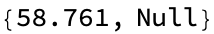
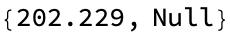
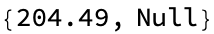

In [146]:
PhiList[eta_] = Import["num/fast2/PhiList.wdx"]; // AbsoluteTiming
G1List[eta_] = Import["num/fast2/G1List.wdx"]; // AbsoluteTiming
G2List[eta_] = Import["num/fast2/G2List.wdx"]; // AbsoluteTiming
kList = Table[PhiList[eta][[i,1]],{i,Length[PhiList[eta]]}];

In [150]:
xi = 10^-2;
xc = 400;
xf = 1000;
dx = \[Pi];
dlogk = 10^-2 Log[10]; dlogk//N

0.0230259

In [155]:
PhiMode[eta_] = Table[UnitStep[eta-xi/kList[[i]],xf/kList[[i]]-eta] PhiList[eta][[i,2]], {i,Length[PhiList[eta]]}];
PhipMode[eta_] = Table[UnitStep[eta-xi/kList[[i]],xf/kList[[i]]-eta] D[PhiList[eta][[i,2]],x]
                    ,{i,Length[PhiList[eta]]}];

In [157]:
G1Mode[eta_] = Table[G1List[eta][[i,2]],{i,Length[G1List[eta]]}];
G1pMode[eta_] = Table[D[G1Mode[eta][[i]],eta],{i,Length[G1Mode[eta]]}];
G2Mode[eta_] = Table[G2List[eta][[i,2]],{i,Length[G2List[eta]]}];
G2pMode[eta_] = Table[D[G2Mode[eta][[i]],eta],{i,Length[G2Mode[eta]]}];

In [161]:
ItGen1[i1_,i2_,iGW_,eta_] := kList[[iGW]] NIntegrate[aint[etap] G1Mode[etap][[iGW]] 
                                (2PhiMode[etap][[i1]] PhiMode[etap][[i2]] 
                                + 4/3/(1+EoSwint[etap])
                                (PhiMode[etap][[i1]] + PhipMode[etap][[i1]]/calHint[etap])
                                (PhiMode[etap][[i2]] + PhipMode[etap][[i2]]/calHint[etap]) ), 
                                {etap,xi/kList[[iGW]],eta}
                                (*,Method->{"GlobalAdaptive", "SymbolicProcessing"->0}*)
                                (*,PrecisionGoal->10*)
                                (*,WorkingPrecision->50,MaxRecursion->20*)]
ItGen2[i1_,i2_,iGW_,eta_] := kList[[iGW]] NIntegrate[aint[etap] G2Mode[etap][[iGW]] 
                                (2PhiMode[etap][[i1]] PhiMode[etap][[i2]] 
                                + 4/3/(1+EoSwint[etap])
                                (PhiMode[etap][[i1]] + PhipMode[etap][[i1]]/calHint[etap])
                                (PhiMode[etap][[i2]] + PhipMode[etap][[i2]]/calHint[etap]) ), 
                                {etap,xi/kList[[iGW]],eta}
                                (*,Method->{"GlobalAdaptive", "SymbolicProcessing"->0}*)
                                (*,PrecisionGoal->10*)
                                (*,WorkingPrecision->50,MaxRecursion->20*)]
ItGen2bar[i_,eta_,ItG1_,ItG2_] := 
    ItG1^2 (G2Mode[(kList[[i]]eta-dx/2)/kList[[i]]][[i]]^2 + G2Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]^2
        + G2Mode[(kList[[i]]eta)/kList[[i]]][[i]]^2 + G2Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]^2)/4 + 
    ItG2^2 (G1Mode[(kList[[i]]eta-dx/2)/kList[[i]]][[i]]^2 + G1Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]^2
        + G1Mode[(kList[[i]]eta)/kList[[i]]][[i]]^2 + G1Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]^2)/4 - 
    2 ItG1 ItG2 (G1Mode[(kList[[i]]eta-dx/2)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta-dx/2)/kList[[i]]][[i]] 
        + G1Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]
        + G1Mode[(kList[[i]]eta)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta)/kList[[i]]][[i]]
        + G1Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]])/4

In [199]:
(G2Mode[(kList[[i]]eta-dx/2)/kList[[i]]][[i]]^2 + G2Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]^2
    + G2Mode[(kList[[i]]eta)/kList[[i]]][[i]]^2 + G2Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]^2)/4 /. {i->401, eta->xc/kList[[401]]} // Quiet
(G1Mode[(kList[[i]]eta-dx/2)/kList[[i]]][[i]]^2 + G1Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]^2
    + G1Mode[(kList[[i]]eta)/kList[[i]]][[i]]^2 + G1Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]^2)/4 /. {i->401, eta->xc/kList[[401]]} // Quiet
(G1Mode[(kList[[i]]eta-dx/2)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta-dx/2)/kList[[i]]][[i]] 
        + G1Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]
        + G1Mode[(kList[[i]]eta)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta)/kList[[i]]][[i]]
        + G1Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]])/4 /. {i->401, eta->xc/kList[[401]]} // Quiet

0.534669
0.632709
0.297138

In [211]:
(G2Mode[(kList[[i]]eta-dx/2)/kList[[i]]][[i]]^2 + G2Mode[(kList[[i]]eta-3 dx/8)/kList[[i]]][[i]]^2
    + G2Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]^2 + G2Mode[(kList[[i]]eta-dx/8)/kList[[i]]][[i]]^2
    + G2Mode[(kList[[i]]eta)/kList[[i]]][[i]]^2 + G2Mode[(kList[[i]]eta+dx/8)/kList[[i]]][[i]]^2
    + G2Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]^2 + G2Mode[(kList[[i]]eta+3 dx/8)/kList[[i]]][[i]]^2)/8 /. {i->401, eta->xc/kList[[401]]} // Quiet
(G1Mode[(kList[[i]]eta-dx/2)/kList[[i]]][[i]]^2 + G1Mode[(kList[[i]]eta-3 dx/8)/kList[[i]]][[i]]^2
    + G1Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]^2 + G1Mode[(kList[[i]]eta-dx/8)/kList[[i]]][[i]]^2
    + G1Mode[(kList[[i]]eta)/kList[[i]]][[i]]^2 + G1Mode[(kList[[i]]eta+dx/8)/kList[[i]]][[i]]^2
    + G1Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]^2 + G1Mode[(kList[[i]]eta+3 dx/8)/kList[[i]]][[i]]^2)/8 /. {i->401, eta->xc/kList[[401]]} // Quiet
(G1Mode[(kList[[i]]eta-dx/2)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta-dx/2)/kList[[i]]][[i]] 
        + G1Mode[(kList[[i]]eta-3 dx/8)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta-3 dx/8)/kList[[i]]][[i]]
        + G1Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta-dx/4)/kList[[i]]][[i]]
        + G1Mode[(kList[[i]]eta-dx/8)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta-dx/8)/kList[[i]]][[i]]
        + G1Mode[(kList[[i]]eta)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta)/kList[[i]]][[i]] 
        + G1Mode[(kList[[i]]eta+dx/8)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta+dx/8)/kList[[i]]][[i]]
        + G1Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta+dx/4)/kList[[i]]][[i]]
        + G1Mode[(kList[[i]]eta+3 dx/8)/kList[[i]]][[i]]G2Mode[(kList[[i]]eta+3 dx/8)/kList[[i]]][[i]])/8 /. {i->401, eta->xc/kList[[401]]} // Quiet

0.534669
0.632709
0.297138

In [164]:
iMax = Length[kList]

601

In [201]:
ItG1 = ItGen1[401,401,401,xc/kList[[401]]] // Quiet // AbsoluteTiming 
ItG2 = ItGen2[401,401,401,xc/kList[[401]]] // Quiet // AbsoluteTiming 
ItGen2bar[401,xc/kList[[401]],ItG1,ItG2] // Quiet // AbsoluteTiming

-14
{0.389994, -6.96626 10   }
                     -14
{0.252717, 2.40117 10   }
                                 -27
{0.060685, {0.0631584, 3.95354 10   }}

In [200]:
kList[[301]]

10000000

{77.9976, Null}
{313.805, Null}
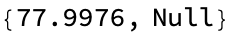
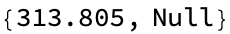

In [216]:
ItG1eqList = Table[{x,ItGen1[301,301,301,x/kList[[301]]]},{x,xi,50,10^-1}]; // AbsoluteTiming
ItG2eqList = Table[{x,ItGen2[301,301,301,x/kList[[301]]]},{x,xi,50,10^-1}]; // AbsoluteTiming

{107.324, Null}
{248.228, Null}
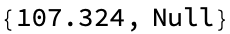
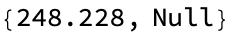

In [219]:
ItG1sqsList = Table[{x,ItGen1[401,401,301,x/kList[[301]]]},{x,xi,50,10^-1}]; // AbsoluteTiming
ItG2sqsList = Table[{x,ItGen2[401,401,301,x/kList[[301]]]},{x,xi,50,10^-1}]; // AbsoluteTiming

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                  -22               -27
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {7.03808 10  }. NIntegrate obtained -5.17006 10    and 1.36314 10    for the integral and error estimates.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                -21               -27
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {6.88118 10  }. NIntegrate obtained 2.4395 10    and 3.45399 10    for the integral and error estimates.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                  -21               -27
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {6.87821 10  }. NIntegrate obtained -1.07907 10    and 3.15493 10    for the integral and error estimates.

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::ncvb will be suppressed during this calculation.

Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.: Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.

Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.: Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.

{468.382, Null}
{456.429, Null}
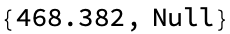
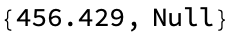

In [223]:
ItG1sqlList = Table[{x,ItGen1[201,301,301,x/kList[[301]]]},{x,xi,50,10^-1}]; // AbsoluteTiming
ItG2sqlList = Table[{x,ItGen2[201,301,301,x/kList[[301]]]},{x,xi,50,10^-1}]; // AbsoluteTiming

Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.00366667], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[PointSize[0.00366667], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[3]], Directive[PointSize[0.00366667], AbsoluteThickness[1.6], 
 
>       RGBColor[0.368627, 0.505882, 0.709804], Dashing[{Small, Small}]], 
 
>      Directive[PointSize[0.00366667], AbsoluteThickness[1.6], 
 
>       RGBColor[0.882353, 0.611765, 0.141176], Dashing[{Small, Small}]], 
 
>      Directive[PointSize[0.00366667], AbsoluteThickness[1.6], 
 
>       RGBColor[0.368627, 0.505882, 0.709804], Dashing[{0, Small}]], 
 
>      Directive[PointSize[0.00366667], AbsoluteThickness[1.6], 
 
>       RGBColor[0.882353, 0.611765, 0.141176], Dashing[{0, Small}]]}, 
 
>     {u == v == 1, None, u == v == 10, None, u == 0.1, v == 1}, 
 
>     LegendMarkers -> 
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}, 
 
>       {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True, True, True, True}, 
 
>     LabelStyle -> Directive[GrayLevel[0], Large, FontFamily -> Palatino], 
 
>     LegendLayout -> Row], {0.6, 0.15}, Identity]]
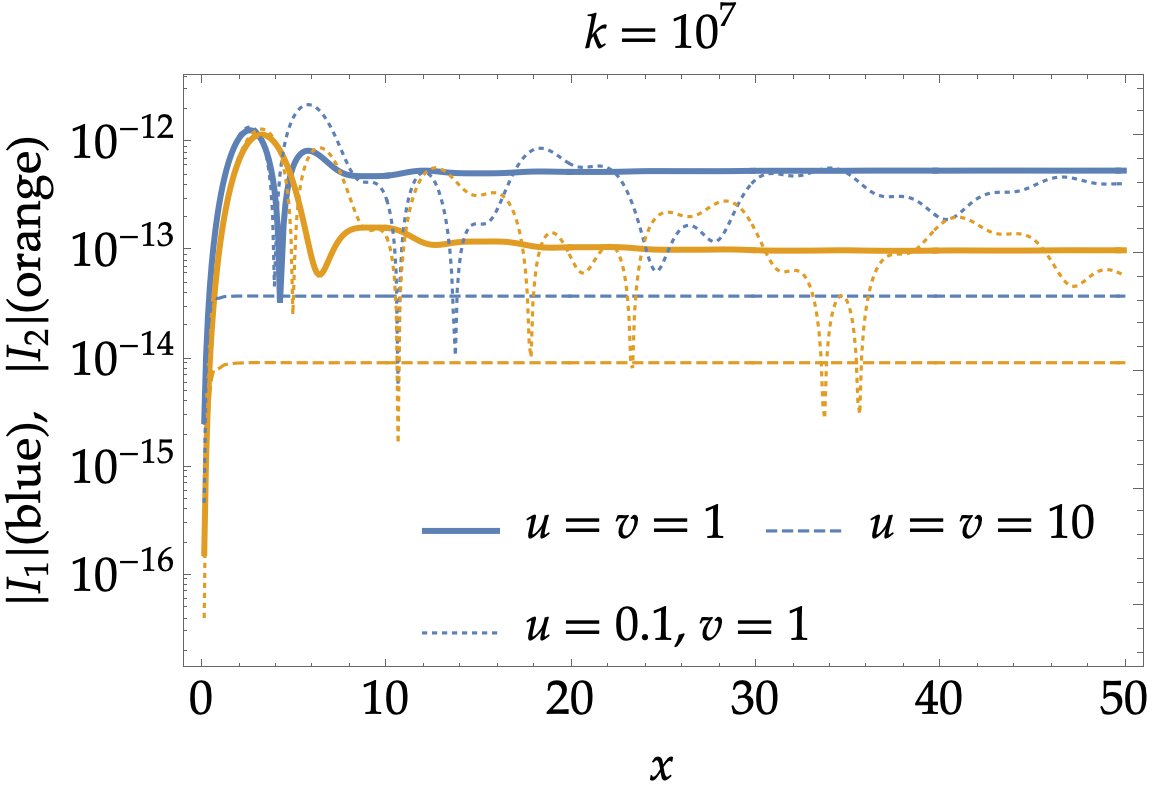

In [272]:
FigItConfig = 
ListLogPlot[{Abs[ItG1eqList],Abs[ItG2eqList],Abs[ItG1sqsList],Abs[ItG2sqsList],Abs[ItG1sqlList],Abs[ItG2sqlList]}
    ,PlotStyle->{AbsoluteThickness[3],AbsoluteThickness[3],{Color[[1]],Dashed},{Color[[2]],Dashed}
        ,{Color[[1]],Dotted},{Color[[2]],Dotted}}
    ,FrameLabel->{{Row[{Abs[Subscript[Style["I",Italic],1]],"(blue),   "
                        ,Abs[Subscript[Style["I",Italic],2]],"(orange)"}],None}
                    ,{x,k==Superscript[10,7]}}
    ,PlotLegends->Placed[LineLegend[{u==v==1,None,u==v==10,None,Row[{u==0.1,", ",v==1}]}
                            ,LegendLayout->"Row"],{0.6,0.15}]]

In [273]:
Export["fast2/ItConfig.pdf",FigItConfig];

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                  -20              -26
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {6.96326 10  }. NIntegrate obtained -3.80737 10    and 4.4883 10    for the integral and error estimates.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                  -20               -26
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {7.09659 10  }. NIntegrate obtained -3.45831 10    and 4.42228 10    for the integral and error estimates.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                  -20               -26
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {7.06161 10  }. NIntegrate obtained -3.53537 10    and 3.83782 10    for the integral and error estimates.

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::ncvb will be suppressed during this calculation.

{117.848, Null}
{110.274, Null}
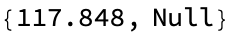
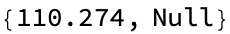

In [230]:
ItG1sqlxcList = Table[{x,ItGen1[201,301,301,x/kList[[301]]]},{x,1,xc}]; // AbsoluteTiming
ItG2sqlxcList = Table[{x,ItGen2[201,301,301,x/kList[[301]]]},{x,1,xc}]; // AbsoluteTiming

-Graphics-
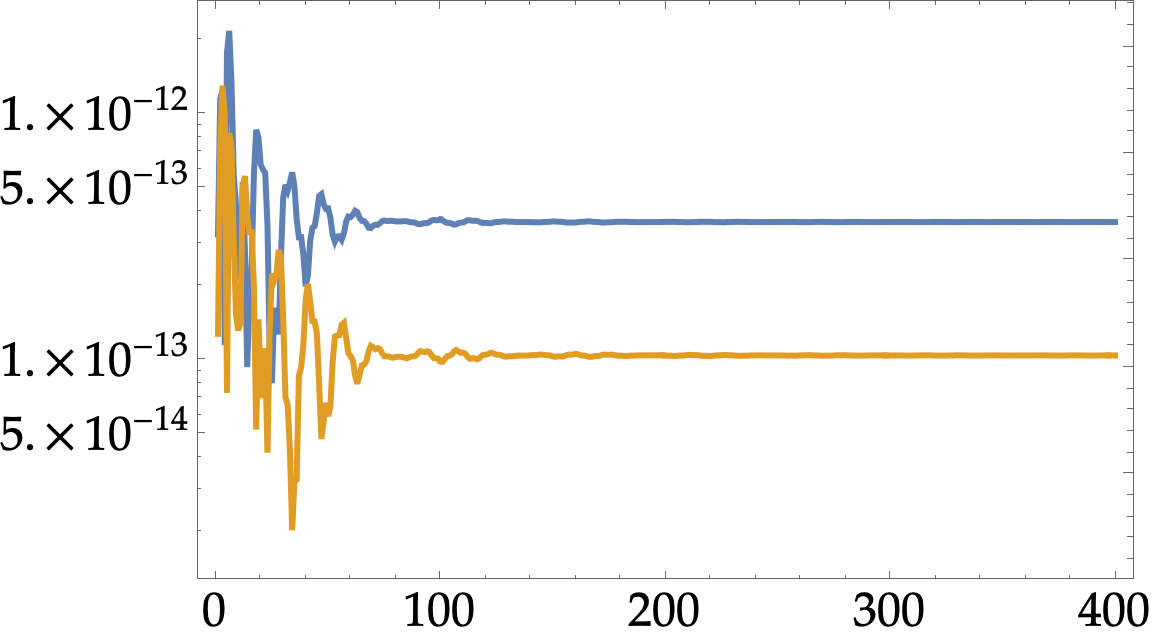

In [237]:
ListLogPlot[{Abs[ItG1sqlxcList],Abs[ItG2sqlxcList]}]

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -6                                 -22               -28
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {4.00828 10  }. NIntegrate obtained 1.86432 10    and 2.92972 10    for the integral and error estimates.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -6                                 -22               -28
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {4.00748 10  }. NIntegrate obtained 1.67301 10    and 2.30955 10    for the integral and error estimates.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                   -6                                 -23               -28
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {6.6975 10  }. NIntegrate obtained 9.10162 10    and 1.83043 10    for the integral and error estimates.

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::ncvb will be suppressed during this calculation.

{148.84, Null}
{143.698, Null}
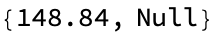
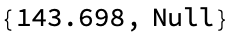

In [238]:
ItG1sqvlxcList = Table[{x,ItGen1[1,301,301,x/kList[[301]]]},{x,1,xc}]; // AbsoluteTiming
ItG2sqvlxcList = Table[{x,ItGen2[1,301,301,x/kList[[301]]]},{x,1,xc}]; // AbsoluteTiming

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.0055], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[PointSize[0.0055], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[3]]}, {Abs[I ], Abs[I ]}, 
                                      1        2
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, Joined -> {True, True}, 
 
>     LabelStyle -> Directive[GrayLevel[0], Large, FontFamily -> Palatino], 
 
>     LegendLayout -> Column], {0.8, 0.2}, Identity]]
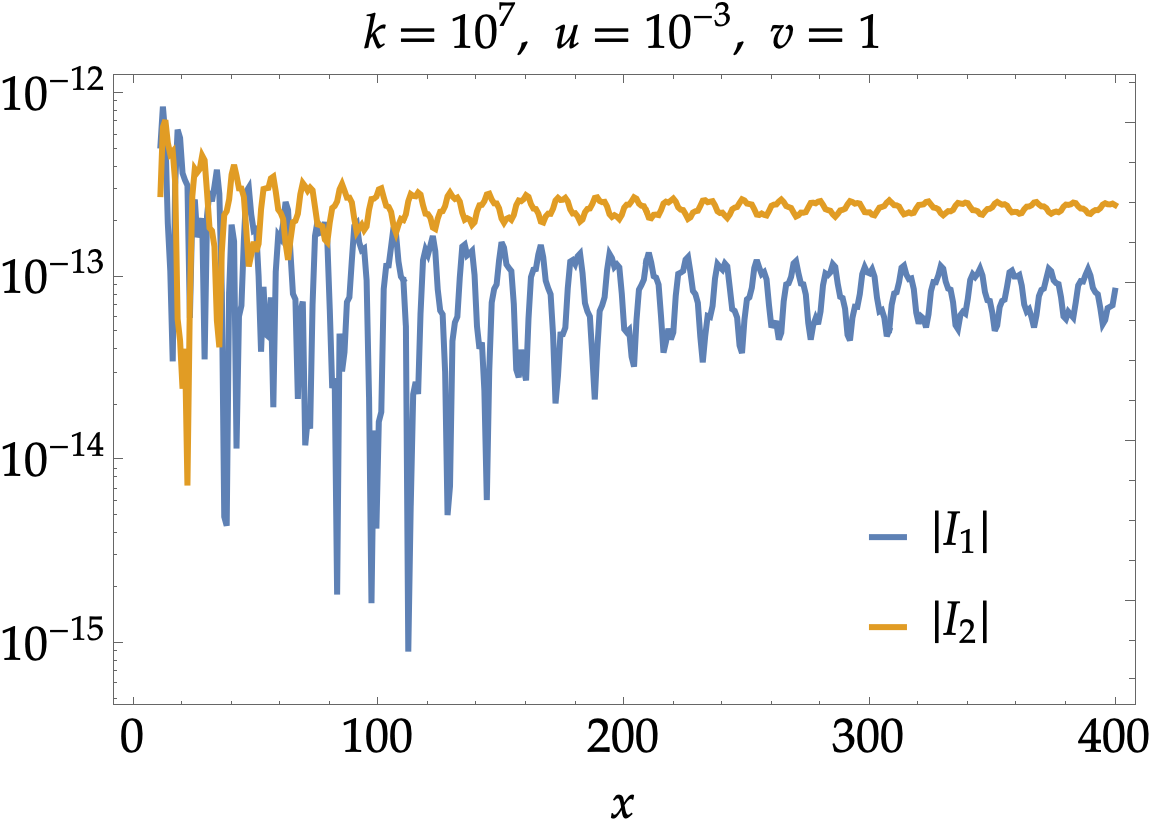

In [268]:
FigItvl = 
ListLogPlot[{Abs[ItG1sqvlxcList],Abs[ItG2sqvlxcList]}
    ,FrameLabel->{{None,None},{x,Row[{k==Superscript[10,7],",  ",u==Superscript[10,-3],",  ",v==1}]}}
    ,PlotLegends->Placed[{Abs[Subscript[Style["I",Italic],1]],Abs[Subscript[Style["I",Italic],2]]},{0.8,0.2}]]

In [270]:
Export["fast2/Itvl.pdf",FigItvl];

In [291]:
i1step = 2;
i2step = 5;
Di = 1000;
Dlogk1 = dlogk i1step; Dlogk1//N
Dlogk2 = dlogk i2step; Dlogk2//N
(*2Di/istep + 1*)
Select[Flatten[Table[If[Abs[kList[[i1]]-kList[[i2]]] <= kList[[300]] <= kList[[i1]]+kList[[i2]],
                    {i1,i2}, {0}], {i1,Max[300-Di,1] (*1*),Min[300+Di,iMax] (*iMax*),i1step}, 
                    {i2,Max[300-Di,1] (*1*),(*Min[300+Di,iMax]*)(*iMax*)i1,i2step}], 1], #[[1]] != 0&] // Length
OGWc[i_,eta_] := 2 8/243 Dlogk1 Dlogk2 / (aint[eta]calHint[eta])^2 *
    Sum[If[Abs[kList[[i1]]-kList[[i2]]] <= kList[[i]] <= kList[[i1]]+kList[[i2]],
        ( kList[[i1]]^2 - (kList[[i]]^2-kList[[i2]]^2+kList[[i1]]^2)^2/4/kList[[i]]^2 )^2 / kList[[i1]]/kList[[i2]] *
            ItGen2bar[i, eta, ItGen1[i1,i2,i,eta], ItGen2[i1,i2,i,eta] ],
        0], {i1,Max[i-Di,1] (*1*),Min[i+Di,iMax] (*iMax*),i1step} 
        ,{i2,Max[i-Di,1] (*1*),(*Min[i+Di,iMax]*)(*iMax*)i1,i2step}]

0.0460517
0.115129
477

In [147]:
kList[[251]] // N

6
3.16228 10

In [157]:
OGWc[251,xc/kList[[251]]] // Quiet // AbsoluteTiming (*2 5*)

{166.162, 0.569831}

In [166]:
OGWc[251,xc/kList[[251]]] // Quiet // AbsoluteTiming (*2 3*)

{280.059, 0.569799}

In [191]:
OGWc[251,xc/kList[[251]]] // Quiet // AbsoluteTiming (*1 1*)

{1631.25, 0.569784}

In [146]:
OGWc[401,xc/kList[[401]]] // Quiet // AbsoluteTiming (*5 5*)

{73.3297, 0.411132}

In [137]:
OGWc[401,xc/kList[[401]]] // Quiet // AbsoluteTiming (*2 5*)

{151.721, 0.357361}

In [128]:
OGWc[401,xc/kList[[401]]] // Quiet // AbsoluteTiming (*2 3*)

{265.329, 0.357335}

In [189]:
Or0h2 = 4.2 10^(-5);
OGW0h2[i_] := (gs0/gsint[xc/kList[[i]]])^(4/3) grhoint[xc/kList[[i]]]/grho0 Or0h2 OGWc[i,xc/kList[[i]]];

In [126]:
OGW0h2[401] // Quiet // AbsoluteTiming

-6
{1. 10  , OGW0h2[401]}

{13451.3, Null}
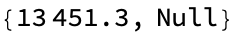

In [191]:
OGW0h2List = Table[{kList[[i]], OGW0h2[i] // Quiet}, {i,1,iMax,20}]; // AbsoluteTiming

In [192]:
Export["num/fast2/OGW0h2_23.dat", OGW0h2List];

In [144]:
OGW0h2List = Import["num/fast2/OGW0h2_25.dat"];

In [193]:
OGW0RDh2Anal[k_] = (gs0/gsint[1/k])^(4/3) grhoint[1/k]/grho0 Or0h2 0.8222;

In [194]:
OGW0h2List[[21,1]] // N
OGW0RDh2Anal[OGW0h2List[[21,1]]]/OGW0h2List[[21,2]]

8
1. 10
1.19363

Legended[Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.0128333], 
 
>        RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]]}, {PT}, 
 
>      LegendMarkers -> {{False, Automatic}}, Joined -> {True}, 
 
>      LabelStyle -> Directive[Larger, FontFamily -> Palatino], LegendLayout -> Column], 
 
>     {0.3, 0.2}, Identity]], Placed[LineLegend[{Directive[Opacity[1.], 
 
>       AbsoluteThickness[1.6], RGBColor[0.882353, 0.611765, 0.141176], 
 
>       Dashing[{0, Small}]]}, {RD anal}, LegendMarkers -> None, 
 
>     LabelStyle -> Directive[Larger, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.3, 0.2}, Identity]]
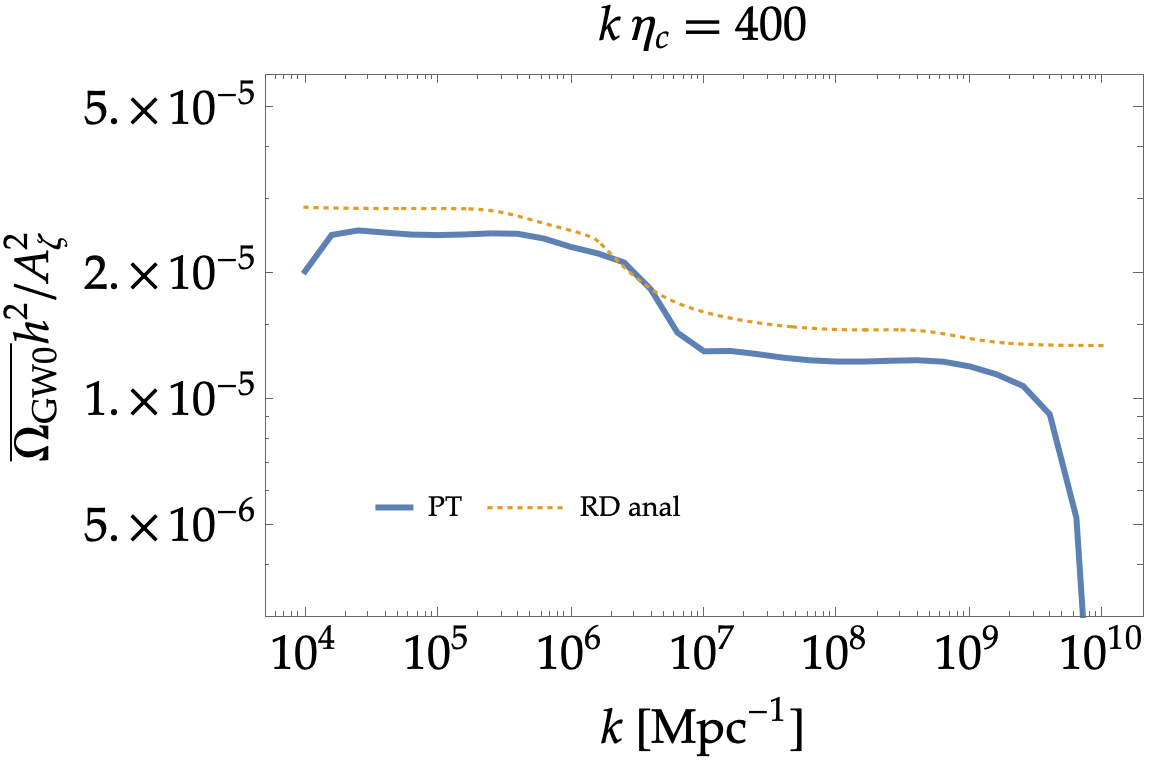

In [196]:
FigOGW0h2wAnal = 
    Show[ListLogLogPlot[OGW0h2List, 
            PlotLegends->Placed[LineLegend[{"PT"}, 
                                    LabelStyle->Directive[Larger,FontFamily->"Palatino"]],
                            {0.3,0.2}],
            PlotRange->{{5 10^3,2 10^10},{3 10^-6,0.6 10^-4}},
            FrameLabel->{{Row[{OverBar[Subscript[\[CapitalOmega],GW0]], h^2, 
                                    "/", Subscript[A,\[Zeta]]^2}], None},
                        {Row[{k, " [", Superscript[Mpc,-1], "]"}], k Subscript[\[Eta],c]==400}}], 
        LogLogPlot[OGW0RDh2Anal[k],{k,10^4,10^10}, PlotStyle->{Color[[2]],Dotted},
            PlotLegends->Placed[LineLegend[{"RD anal"},
                                    LabelStyle->Directive[Larger,FontFamily->"Palatino"]],
                            {0.3,0.2}]
    ]]

In [192]:
Export["fast2/OGW0h2.pdf",FigOGW0h2wAnal];

{55.6073, Null}
{233.065, Null}
{229.499, Null}
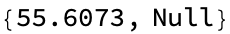
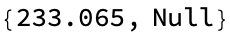
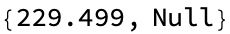

In [90]:
PhiList[eta_] = Import["num/fast2/PhiList.wdx"]; // AbsoluteTiming
G1List[eta_] = Import["num/fast2/G1List.wdx"]; // AbsoluteTiming
G2List[eta_] = Import["num/fast2/G2List.wdx"]; // AbsoluteTiming
kList = Table[PhiList[eta][[i,1]],{i,Length[PhiList[eta]]}];

In [131]:
iMax = Length[kList]

601

In [94]:
xi = 10^-2;
xc = 400;
xf = 1000;
dx = \[Pi];
dlogk = 10^-2 Log[10]; dlogk//N

0.0230259

In [99]:
PhiMode[eta_] = Table[UnitStep[eta-xi/kList[[i]],xf/kList[[i]]-eta] PhiList[eta][[i,2]], {i,Length[PhiList[eta]]}];
PhipMode[eta_] = Table[UnitStep[eta-xi/kList[[i]],xf/kList[[i]]-eta] D[PhiList[eta][[i,2]],x]
                    ,{i,Length[PhiList[eta]]}];

In [101]:
G1Mode[eta_] = Table[G1List[eta][[i,2]],{i,Length[G1List[eta]]}];
G1pMode[eta_] = Table[D[G1Mode[eta][[i]],eta],{i,Length[G1Mode[eta]]}];
G2Mode[eta_] = Table[G2List[eta][[i,2]],{i,Length[G2List[eta]]}];
G2pMode[eta_] = Table[D[G2Mode[eta][[i]],eta],{i,Length[G2Mode[eta]]}];

In [105]:
GreenGMode[eta_,etap_] = 
    Table[(G1Mode[eta][[i]]G2Mode[etap][[i]]-G2Mode[eta][[i]]G1Mode[etap][[i]]),{i,Length[G1Mode[eta]]}];

In [119]:
ItGen[i1_,i2_,iGW_,eta_] := kList[[iGW]] NIntegrate[aint[etap] GreenGMode[eta,etap][[iGW]] 
                                (2PhiMode[etap][[i1]] PhiMode[etap][[i2]] 
                                + 4/3/(1+EoSwint[etap])
                                (PhiMode[etap][[i1]] + PhipMode[etap][[i1]]/calHint[etap])
                                (PhiMode[etap][[i2]] + PhipMode[etap][[i2]]/calHint[etap]) ), 
                                {etap,xi/kList[[iGW]],eta}
                                (*,Method->{"GlobalAdaptive", "SymbolicProcessing"->0}*)
                                (*,PrecisionGoal->10*)
                                (*,WorkingPrecision->50,MaxRecursion->20*)]
ItGen2bar[i1_,i2_,iGW_,eta_] := (ItGen[i1,i2,iGW,eta-dx/2/kList[[iGW]]]^2 + ItGen[i1,i2,iGW,eta-dx/4/kList[[iGW]]]^2
                            + ItGen[i1,i2,iGW,eta]^2 + ItGen[i1,i2,iGW,eta+dx/4/kList[[iGW]]]^2)/4;

In [121]:
ItGen[401,401,401,xc/kList[[401]]] // AbsoluteTiming

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                1
Input value {------} lies outside the range of data in the interpolating function. Extrapolation will be used.
             250000

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                1
Input value {------} lies outside the range of data in the interpolating function. Extrapolation will be used.
             250000

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                1
Input value {------} lies outside the range of data in the interpolating function. Extrapolation will be used.
             250000

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

-14
{0.359855, -8.45492 10   }

In [122]:
ItGen2bar[401,401,401,xc/kList[[401]]] // AbsoluteTiming

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                1         Pi
Input value {------ - ---------} lies outside the range of data in the interpolating function. Extrapolation will be used.
             250000   200000000

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                1         Pi
Input value {------ - ---------} lies outside the range of data in the interpolating function. Extrapolation will be used.
             250000   200000000

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                1         Pi
Input value {------ - ---------} lies outside the range of data in the interpolating function. Extrapolation will be used.
             250000   200000000

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

-27
{1.36994, 3.95368 10   }

In [132]:
i1step = 2;
i2step = 5;
Di = 1000;
Dlogk1 = dlogk i1step; Dlogk1//N
Dlogk2 = dlogk i2step; Dlogk2//N
(*2Di/istep + 1*)
Select[Flatten[Table[If[Abs[kList[[i1]]-kList[[i2]]] <= kList[[300]] <= kList[[i1]]+kList[[i2]],
                    {i1,i2}, {0}], {i1,Max[300-Di,1] (*1*),Min[300+Di,iMax] (*iMax*),i1step}, 
                    {i2,Max[300-Di,1] (*1*),(*Min[300+Di,iMax]*)(*iMax*)i1,i2step}], 1], #[[1]] != 0&] // Length
OGWc[i_,eta_] := 2 8/243 Dlogk1 Dlogk2 / (aint[eta]calHint[eta])^2 *
    Sum[If[Abs[kList[[i1]]-kList[[i2]]] <= kList[[i]] <= kList[[i1]]+kList[[i2]],
        ( kList[[i1]]^2 - (kList[[i]]^2-kList[[i2]]^2+kList[[i1]]^2)^2/4/kList[[i]]^2 )^2 
            / kList[[i1]]/kList[[i2]] ItGen2bar[i1,i2,i,eta],
        0], {i1,Max[i-Di,1] (*1*),Min[i+Di,iMax] (*iMax*),i1step} 
        ,{i2,Max[i-Di,1] (*1*),(*Min[i+Di,iMax]*)(*iMax*)i1,i2step}]

0.0460517
0.115129
477

In [140]:
OGWc[401,xc/kList[[401]]] // AbsoluteTiming

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                1         Pi
Input value {------ - ---------} lies outside the range of data in the interpolating function. Extrapolation will be used.
             250000   200000000

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                1         Pi
Input value {------ - ---------} lies outside the range of data in the interpolating function. Extrapolation will be used.
             250000   200000000

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                1         Pi
Input value {------ - ---------} lies outside the range of data in the interpolating function. Extrapolation will be used.
             250000   200000000

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                  -23               -29
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {6.74639 10  }. NIntegrate obtained -4.65671 10    and 8.68732 10    for the integral and error estimates.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                  -23               -29
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {6.73754 10  }. NIntegrate obtained -6.64101 10    and 7.29736 10    for the integral and error estimates.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                    -7                                  -23               -29
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in etap near {etap} = {6.74911 10  }. NIntegrate obtained -1.34048 10    and 6.05665 10    for the integral and error estimates.

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::ncvb will be suppressed during this calculation.

Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.: Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.

Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.: Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.

Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.: Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::slwcon will be suppressed during this calculation.

{663.781, 0.35736}

In [141]:
Or0h2 = 4.2 10^(-5);
OGW0h2[i_] := (gs0/gsint[xc/kList[[i]]])^(4/3) grhoint[xc/kList[[i]]]/grho0 Or0h2 OGWc[i,xc/kList[[i]]];

{21559.6, Null}
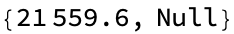

In [143]:
OGW0h2List = Table[{kList[[i]], OGW0h2[i] // Quiet}, {i,1,iMax,20}]; // AbsoluteTiming

In [144]:
Export["num/fast2/OGW0h2_25_Green.dat", OGW0h2List];

In [145]:
OGW0RDh2Anal[k_] = (gs0/gsint[1/k])^(4/3) grhoint[1/k]/grho0 Or0h2 0.8222;

Legended[Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.0128333], 
 
>        RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]]}, {PT}, 
 
>      LegendMarkers -> {{False, Automatic}}, Joined -> {True}, 
 
>      LabelStyle -> Directive[Larger, FontFamily -> Palatino], LegendLayout -> Column], 
 
>     {0.3, 0.2}, Identity]], Placed[LineLegend[{Directive[Opacity[1.], 
 
>       AbsoluteThickness[1.6], RGBColor[0.882353, 0.611765, 0.141176], 
 
>       Dashing[{0, Small}]]}, {RD anal}, LegendMarkers -> None, 
 
>     LabelStyle -> Directive[Larger, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.3, 0.2}, Identity]]
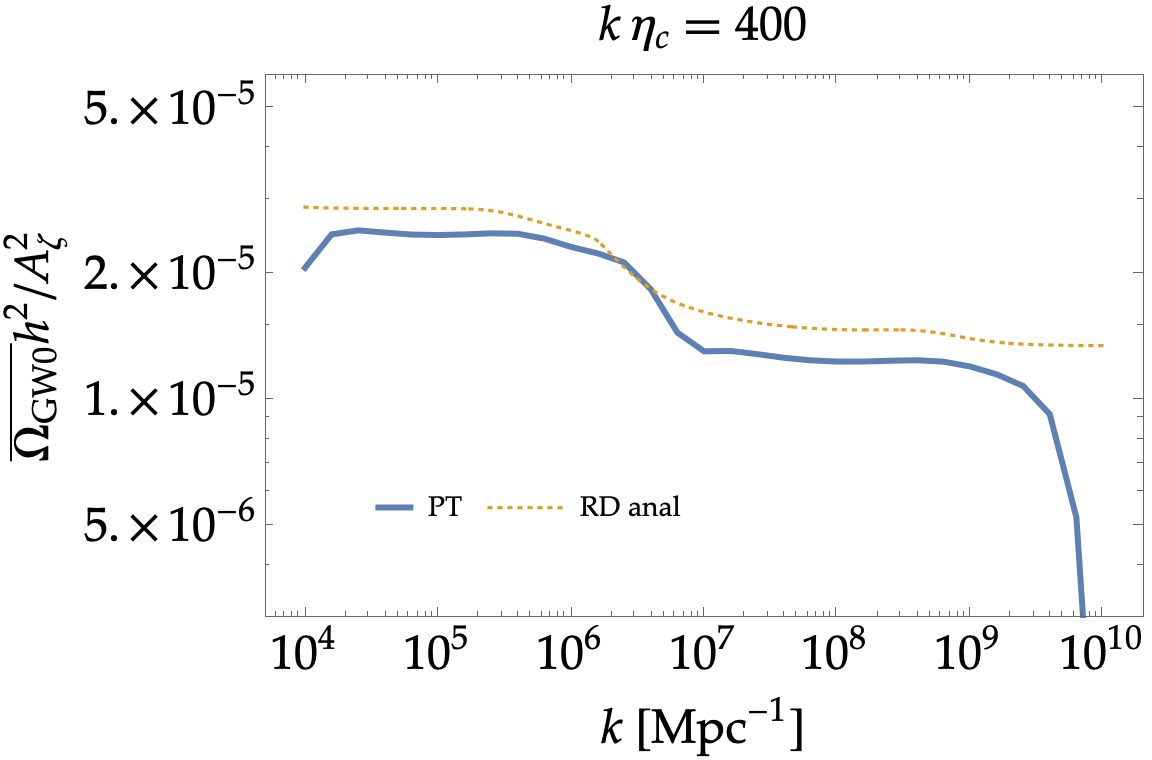

In [146]:
FigOGW0h2wAnal = 
    Show[ListLogLogPlot[OGW0h2List, 
            PlotLegends->Placed[LineLegend[{"PT"}, 
                                    LabelStyle->Directive[Larger,FontFamily->"Palatino"]],
                            {0.3,0.2}],
            PlotRange->{{5 10^3,2 10^10},{3 10^-6,0.6 10^-4}},
            FrameLabel->{{Row[{OverBar[Subscript[\[CapitalOmega],GW0]], h^2, 
                                    "/", Subscript[A,\[Zeta]]^2}], None},
                        {Row[{k, " [", Superscript[Mpc,-1], "]"}], k Subscript[\[Eta],c]==400}}], 
        LogLogPlot[OGW0RDh2Anal[k],{k,10^4,10^10}, PlotStyle->{Color[[2]],Dotted},
            PlotLegends->Placed[LineLegend[{"RD anal"},
                                    LabelStyle->Directive[Larger,FontFamily->"Palatino"]],
                            {0.3,0.2}]
    ]]

In [147]:
Export["fast2/OGW0h2_25_Green.pdf",FigOGW0h2wAnal];